In [2]:
from sklearn.model_selection import train_test_split

import os
import pandas as pd

# classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

import sys
sys.path.insert(0, '../')

from TextLabeller import *

%matplotlib inline

/Users/dc/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/dc/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
from plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [3]:
def classify(x, y, train_test_ratio):

    x_train, test, train_labels, test_labels = train_test_split(x, y, test_size = train_test_ratio)

    print('input dimensions:', len(x), '|', 'output dimensions:', len(y))
    print('x_train dimensions:', len(x_train), '|', 'y_train dimensions:', len(train_labels))
    print('x_test dimensions:', len(test), '|', 'y_test dimensions:', len(test_labels)) 

    # Initialize classifier
    rfc = RandomForestClassifier()

    # Train classifier
    model = rfc.fit(x_train, train_labels)

    # Make predictions
    y_preds = rfc.predict(test)

    # Evaluate model
    print(classification_report(test_labels, y_preds))
    print(accuracy_score(test_labels, y_preds))
    print(confusion_matrix(test_labels, y_preds))
    
    return test_labels, y_preds


# ROC Curve
def plot_roc_curve(test_labels, y_preds):
    fpr, tpr, threshold = roc_curve(test_labels, y_preds)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [4]:
METRIC = "levenshtein"

labelled_real=f'{METRIC}_labelled_real_text.csv'
labelled_fake=f'{METRIC}_labelled_fake_text.csv'

real_data = pd.read_csv(labelled_real)
fake_data = pd.read_csv(labelled_fake)

combined_data = real_data.append(fake_data)

y = combined_data['label'].values

## Classify using both novelty and diversity

input dimensions: 21840 | output dimensions: 21840
x_train dimensions: 17472 | y_train dimensions: 17472
x_test dimensions: 4368 | y_test dimensions: 4368
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      2222
          1       1.00      0.99      0.99      2146

avg / total       0.99      0.99      0.99      4368

0.9926739926739927
[[2217    5]
 [  27 2119]]


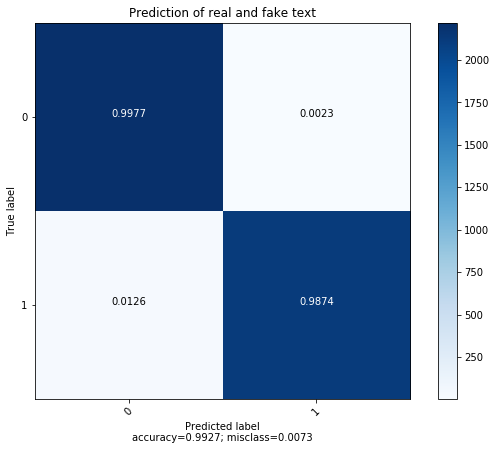

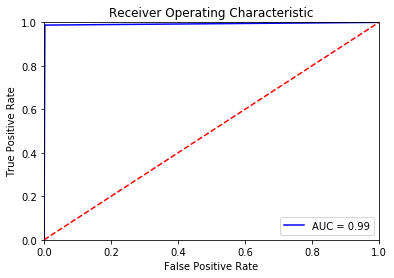

In [5]:
novs = combined_data['novelty'].values
divs = combined_data['diversity'].values

x = list()
for ix, nov in enumerate(novs):
    x.append([nov, divs[ix]])

test_labels, y_preds = classify(x, y, train_test_ratio=0.2)

plot_confusion_matrix(cm           = confusion_matrix(test_labels, y_preds), # confusion matrix created by sklearn.metrics.confusion_matrix
                      normalize    = True,                # show proportions
                      target_names = [0, 1],       # list of names of the classes
                      title        = 'Prediction of real and fake text') # title of graph
    
plot_roc_curve(test_labels=test_labels, y_preds=y_preds)

## Classify using only novelty

input dimensions: 21840 | output dimensions: 21840
x_train dimensions: 17472 | y_train dimensions: 17472
x_test dimensions: 4368 | y_test dimensions: 4368
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      2230
          1       0.99      0.97      0.98      2138

avg / total       0.98      0.98      0.98      4368

0.9784798534798534
[[2199   31]
 [  63 2075]]


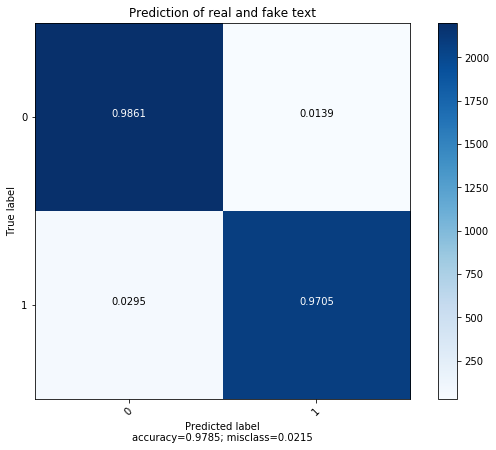

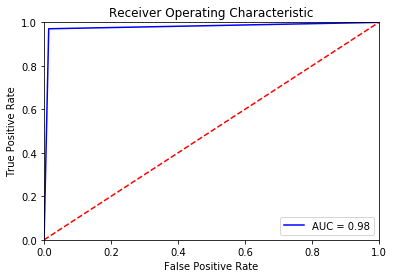

In [6]:
novs = combined_data['novelty'].values

x = list()
for ix, nov in enumerate(novs):
    x.append([nov])

test_labels, y_preds = classify(x, y, train_test_ratio=0.2)

plot_confusion_matrix(cm           = confusion_matrix(test_labels, y_preds), # confusion matrix created by sklearn.metrics.confusion_matrix
                      normalize    = True,                # show proportions
                      target_names = [0, 1],       # list of names of the classes
                      title        = 'Prediction of real and fake text') # title of graph
    
plot_roc_curve(test_labels=test_labels, y_preds=y_preds)

## Classify using only diversity

input dimensions: 21840 | output dimensions: 21840
x_train dimensions: 17472 | y_train dimensions: 17472
x_test dimensions: 4368 | y_test dimensions: 4368
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      2179
          1       0.99      0.99      0.99      2189

avg / total       0.99      0.99      0.99      4368

0.9908424908424909
[[2162   17]
 [  23 2166]]


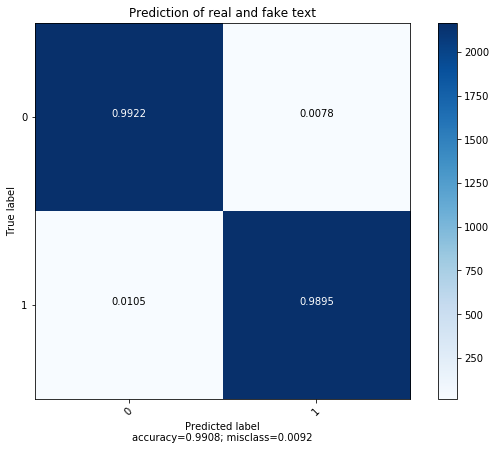

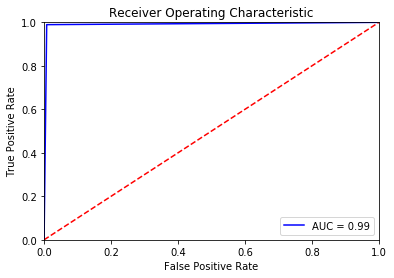

In [7]:
divs = combined_data['diversity'].values

x = list()
for ix, div in enumerate(divs):
    x.append([div])

test_labels, y_preds = classify(x, y, train_test_ratio=0.2)

plot_confusion_matrix(cm           = confusion_matrix(test_labels, y_preds), # confusion matrix created by sklearn.metrics.confusion_matrix
                      normalize    = True,                # show proportions
                      target_names = [0, 1],       # list of names of the classes
                      title        = 'Prediction of real and fake text') # title of graph
    
plot_roc_curve(test_labels=test_labels, y_preds=y_preds)

## Classify with both novelty and diversity: test with unseen data (TBD)

In [8]:
# novs = combined_data['novelty'].values
# divs = combined_data['diversity'].values

# x = list()
# for ix, nov in enumerate(novs):
#     x.append([nov, divs[ix]])
    
# # unlabelled_real='unlabelled_real_text.csv' # not really unlabelled, just missing novelty and diversity
# # unlabelled_fake='unlabelled_fake_text.csv' # same here

# # _real_data = pd.read_csv(unlabelled_real)
# # _fake_data = pd.read_csv(unlabelled_real)

# # _combined_data = _real_data.append(_fake_data)

# # x_train, test, train_labels, test_labels = x,  , y, _combined_data['label'].values

# x_train, test, train_labels, test_labels = train_test_split(x, y, test_size = 0.10)

# print('input dimensions:', len(x), '|', 'output dimensions:', len(y))
# print('x_train dimensions:', len(x_train), '|', 'y_train dimensions:', len(train_labels))
# print('x_test dimensions:', len(test), '|', 'y_test dimensions:', len(test_labels)) 

# import xgboost as xgb
# model = xgb.XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, 
#                           reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8)
# model.fit(x_train, train_labels) 


# # # Initialize classifier
# # rfc = RandomForestClassifier()

# # # Train classifier
# # model = rfc.fit(x_train, train_labels)

# # Make predictions
# preds = rfc.predict(test)

# # Evaluate model
# from sklearn.metrics import classification_report, accuracy_score
# print(classification_report(test_labels, preds))
# print(accuracy_score(test_labels, preds))